<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Marc Spiegelman</td>
</table>

In [1]:
%matplotlib inline
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt


# Fun with polynomials

**GOAL:** Explore the ideas of Interpolation, Least Squares fitting and projection of continous functions onto the function space $P_2[-1,1]$

### The Space $P_2[-1,1]$

Consider the space of all second order polynomials on the closed interval $x\in[-1,1]$ which is a subspace of continuous functions $C^0[-1,1]$.   To completely describe a vector space we need a basis:  a set of linear independent vectors that span the space.  While there are many possible bases for $P_2[-1,1]$, here we will consider the simplest **monomial** basis $p_0(x)=1$, $p_1(x)=x$, $p_2(x)=x^2$ or

$$
    P_2(x)[-1,1] = \mathrm{span}<1,x,x^2>
$$

i.e. every vector in $P_2$ can be written as a linear combination of the basis vectors as 

$$
    f(x) = c_0p_0 + c_1p_1 + c_2p_2 = c_0 + c_1 x + c_2x^2
$$

The space P_2(x)[-1,1] is said to be *isomorphic* to $R^3$ as every vector in $P_2$ can be associated with a unique vector in $R^3$ 

$$
    \mathbf{c}= [ c_0, c_1, c_2]^T
$$

here we will set up a bit of python to evaluate polynomials



In [2]:
# lambda functions for each of the basis functions
p0 = lambda x: np.ones(x.shape)
p1 = lambda x: x
p2 = lambda x: x**2


# lambda function for the matrix whose columns are p_i(x)
A = lambda x: np.array([ p0(x), p1(x), p2(x)]).transpose()

# lambda function for any vector in P_2,  v = c[0]*p0 + c[1]*p1 + c[2]*p2
v = lambda c,x :  np.dot(A(x),c)

x = np.array([-1.,0.,1.])
print p0(x),p1(x),p2(x)

print A(x)

c = np.array([1,2,-1])
print v(c,x)



[ 1.  1.  1.] [-1.  0.  1.] [ 1.  0.  1.]
[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]]
[-2.  1.  2.]


and plot them

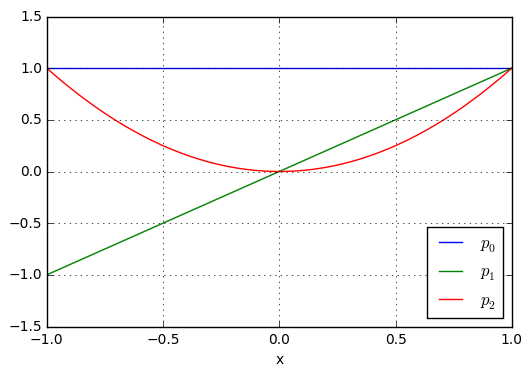

In [3]:
x = np.linspace(-1,1)
plt.figure()
plt.plot(x,p0(x),label='$p_0$')
plt.hold(True)
plt.plot(x,p1(x),label='$p_1$')
plt.plot(x,p2(x),label='$p_2$')
plt.xlabel('x')
plt.ylim(-1.5,1.5)
plt.legend(loc='best')
plt.grid()
plt.show()

Now let's find the *interpolating* polynomial that goes through exactly three points.
$f(-1)=0$, $f(0)=2$, $f(1)=-1$ by solving the invertible system of linear equations

$$
    [\, p_0(x)\quad p_1(x)\quad p_2(x)\, ] \mathbf{c} = f(x)
$$ 

for the three points in  $x=[-1,0,1]^T$

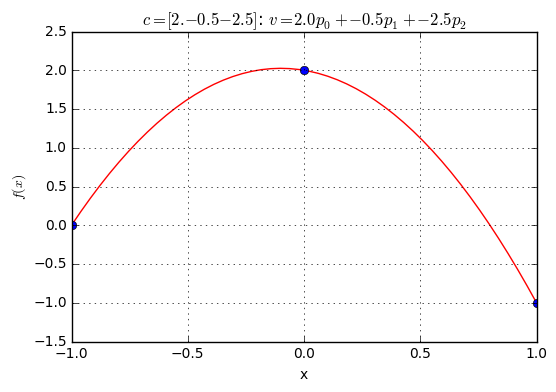

In [4]:
x = np.array([-1.,0.,1.])
f = np.array([0.,2.,-1.])
c = la.solve(A(x),f)

# and plot it out
xx = np.linspace(-1,1) # use well sampled space for plotting the quadratic
plt.figure()
# plot the parabola
plt.plot(xx,v(c,xx),'r-')
# plot the interpolating points
plt.plot(x,f,'bo')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.ylim(-1.5,2.5)
plt.title('$c={}$: $v ={}p_0 + {}p_1 + {}p_2$'.format(c,c[0],c[1],c[2]))
plt.grid()
plt.show()


## Least Squares problems: 

Given the value of a function at any three distinct points is sufficient to describe uniquely the interpolating quadratic through those points.  But suppose we were given more than 3 points, say 7, in which case the matrix $A$ would be $7\times3$ with rank $r=3$  and unless those 7 points were on the same parabola,  there would be no solution to the overdetermined problem.  Here we will create that problem by adding more points to the interpolating parabola calculated above and then perturb it with uniform random noise.

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


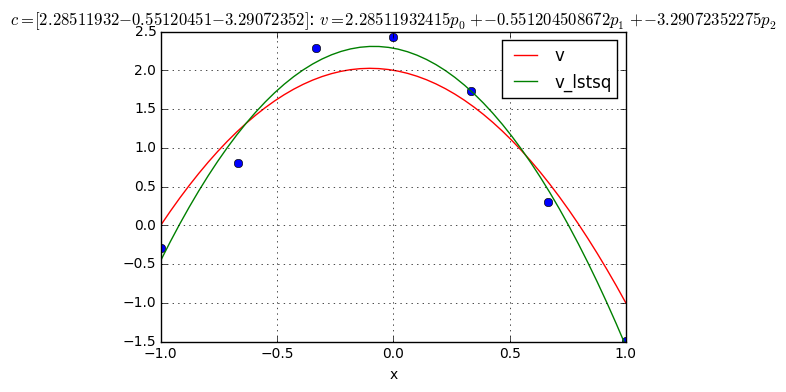

numpy least-squares c = [ 2.28511932 -0.55120451 -3.29072352]
normal equations      = [ 2.28511932 -0.55120451 -3.29072352]
difference            = [  0.00000000e+00  -5.55111512e-16   8.88178420e-16]

ATA =[[  7.00000000e+00  -2.22044605e-16   3.11111111e+00]
 [ -2.22044605e-16   3.11111111e+00  -2.22044605e-16]
 [  3.11111111e+00  -2.22044605e-16   2.41975309e+00]]


In [5]:
# choose 7 evenly spaced points in [-1,1]
x = np.linspace(-1,1,7)

# perturb the parabola with uniform random noise
f = v(c,x) + np.random.uniform(-.5,.5,len(x))

# and plot with respect to the underlying parabola
plt.figure()
plt.plot(x,f,'bo')
plt.hold(True)
plt.plot(xx,v(c,xx),'r',label='v')
plt.xlabel('x')
plt.ylim(-1.5,2.5)
plt.grid()

# now calculate and plot the leastsquares solution to Ac = f
c_ls,res,rank,s = la.lstsq(A(x),f)

plt.plot(xx,v(c_ls,xx),'g',label='v_lstsq')
plt.title('$c={}$: $v={}p_0 + {}p_1 + {}p_2$'.format(c_ls,c_ls[0],c_ls[1],c_ls[2]))
plt.legend(loc='best')
plt.show()

# and show that this is the same solution we would get if we tried to solve the normal equations direction

AtA = np.dot(A(x).transpose(),A(x))
Atf = np.dot(A(x).transpose(),f)

c_norm = la.solve(AtA,Atf)

print 'numpy least-squares c = {}'.format(c_ls)
print 'normal equations      = {}'.format(c_norm)
print 'difference            = {}'.format(c_ls-c_norm)

print
print 'ATA ={}'.format(AtA)

### Errors

Now let's show that the error $e= f(x) - A(x)c$ is orthogonal to the column space of $A$ i.e. $A^T e = 0$

In [6]:
# calculate the error vector
e = f - v(c_ls,x)

print 'error vector\n e={}\n'.format(e)

# and calculate the matrix vector product A^T e
print 'A^T e = {}'.format(np.dot(A(x).transpose(),e))

error vector
 e=[ 0.15642102 -0.38554983  0.17996765  0.14544872 -0.00696919 -0.15305542
  0.06373703]

A^T e = [ -4.16333634e-15   1.58206781e-15  -3.52495810e-15]


## Projection of a function onto $P_2[-1,1]$

Now let's extend this problem to finding the best fit projection of a continuous function $f(x)$ onto $P_2$.  While we could extend the previous approach by sampling $f(x)$ at a large number of points and calculating the least-squares solution,  we can also solve the continuous problem by changing the definition of the inner product from the dot product in $R^n$ to the inner product for continuous functions

$$
    <f,g> = \int_{-1}^{1} fg dx
$$

However the overall approach remains the same as the discrete least squares problem.  

If we now consider a function $u \in P_2[-1,1]$ such that

$$
    u(x) = \sum_i c_i p_i(x)
$$ 

then the continous error (or residual) is given by

$$
    e(x) = u(x) - f(x)
$$

for the continuous variable $x\in[-1,1]$.

The least square problem now becomes "find $\mathbf{c}\in R^3$ that minimizes $||e||_{L2}$", i.e. the  "length" of $e$ in the $L^2$ norm.  Alternatively this requires that the error $e(x)$ is orthogonal to all the basis vectors in $P_2$, i.e.   

$$
 <p_i,e> = 0 \quad \mathrm{for\, }i=0,1,2
$$

or

$$
    \int_{-1}^{1} p_i e dx = \int_{-1}^{1} p_i ( u - f) dx = 0
$$
or solve 
$$
     \int_{-1}^{1} p_i \left(\sum_j c_j p_j(x)\right)dx =  \int_{-1}^{1} p_i f dx
$$ 

for all $i,j=0,1,2$.  Rearranging the summation and the integral sign, we can rewrite the problem as 

$$
    \sum_j M_{ij} c_j = \hat{f}_i
$$

where

$$
    M_{ij} = <p_i,p_j>=\int_{-1}^{1} p_i p_j dx\quad \mathrm{and}\quad \hat{f}_i = <p_i,f> = \int_{-1}^{1} p_i f dx
$$ 

or in matrix vector notation $M\mathbf{c} = \hat{\mathbf{f}}$ where $M$ is the "mass-matrix (and corresponds to the symmetric matrix $A^TA$) and $\hat{\mathbf{f}}$ is the "load vector" which corresponds to  $A^t\mathbf{b}$.

For the simple monomial basis, we can calculate the terms of $M$ easily, but here we will just use scipy's numerical quadrature routines
    

We'll start by defining our function and calculating its *interpolation* onto $P_2[-1,1]$ as the unique quadratic that interpolates $f(x)$ at $x=[-1,0,1]$

In [7]:
#  set the function to be projected
f = lambda x : np.cos(2*x) + np.sin(1.5*x)

# calculate the interpolation of f onto P2, when sampled at points -1,0,1
x = np.array([-1., 0., 1.])
c_interp = la.solve(A(x),f(x))



Now calculate the mass matrix and load vector and solve for the galerkin projection of $f$ onto  $P_2[-1,1]$

In [8]:
from scipy.integrate import quad

def mij(i,j,x):
    """ integrand for component Mij of the mass matrix"""
    p = np.array([1., x, x**2])
    return p[i]*p[j]

def fi(i,x,f):
    """ integrand for component i of the load vector"""
    p = np.array([1., x, x**2])
    return p[i]*f(x)





# construct the symmetric mass matrix  M_ij = <p_i,p_j> 

M = np.zeros((3,3))
fhat = np.zeros(3)
R = np.zeros((3,3)) # quadrature residuals

# loop over the upper triangular elements of M (and fill in the symmetric parts)
for i in range(0,3):
    fhat[i] = quad(lambda x: fi(i,x,f),-1.,1.)[0]
    for j in range(i,3):
        result = quad(lambda x: mij(i,j,x),-1.,1.)
        M[i,j] = result[0]
        M[j,i] = M[i,j]
        R[i,j] = result[1]
        R[j,i] = R[i,j]
        
        
print 'M = {}\n'.format(M)
print 'fhat = {}\n'.format(fhat)        

# and solve for c
c_galerkin = la.solve(M,fhat)

print 'c_galerkin ={}'.format(c_galerkin)

M = [[ 2.          0.          0.66666667]
 [ 0.          0.66666667  0.        ]
 [ 0.66666667  0.          0.4       ]]

fhat = [ 0.90929743  0.79234594  0.03850188]

c_galerkin =[ 0.95076859  1.18851891 -1.48835962]


And let's just plot out the three function $f(x)$, $f_{interp}(x)$ it's interpolant, and $u(x)$ it's projection onto $P_2[-1,1]$

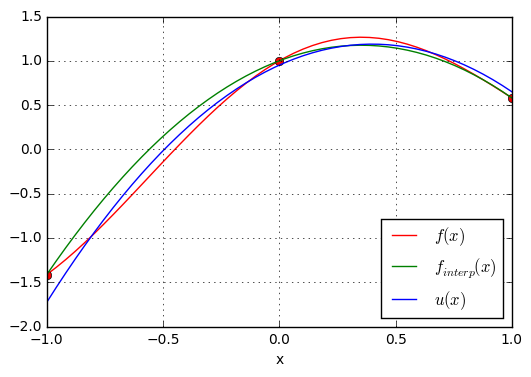

In [9]:


# now plot them all out and compare
plt.figure()
plt.plot(xx,f(xx),'r',label='$f(x)$')
plt.hold(True)
plt.plot(x,f(x),'ro')
plt.plot(xx,v(c_interp,xx),'g',label='$f_{interp}(x)$')
plt.plot(xx,v(c_galerkin,xx),'b',label='$u(x)$')
plt.xlabel('x')
plt.grid()
plt.legend(loc='best')
plt.show()